In [39]:
import pandas as pd 
from sklearn import datasets
import matplotlib.pyplot as plt
from ConvexHull_v2 import ConvexHull_v2

print("Selamat datang di Uji Coba Convex Hull v.2.0.1")
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print()
print("")




data = datasets.load_iris() 
#create a DataFrame 
df = pd.DataFrame(data.data, columns=data.feature_names) 
df['Target'] = pd.DataFrame(data.target)
#df.head()


# plt.figure(figsize = (10, 6))
# colors = ['b','r','g']
# plt.title('Petal Width vs Petal Length')
# plt.xlabel(data.feature_names[0])
# plt.ylabel(data.feature_names[1])
# for i in range(len(data.target_names)):
#     if i==2:
#         break
#     each = df[df['Target'] == i]              # untuk mengambil data dengan target yang seragam
#     bucket = each.iloc[:,[2,3]].values        # untuk mendapatkan aray berupa posisi x dan y, berukuran n x 2, n adalah banyak data
#     hull = ConvexHull_v2(bucket)                   # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
#     plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
#     for simplex in hull:
#         plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[i])
# plt.legend()

Selamat datang di Uji Coba Convex Hull v.2.0.1
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~




In [40]:
# e2 = df[df['Target'] == 2]
# e2

50


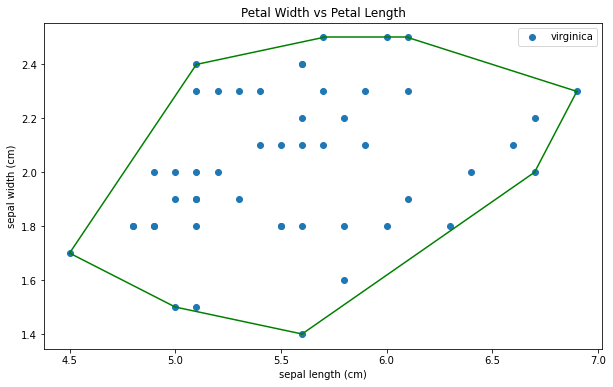

In [41]:
from scipy.spatial import ConvexHull

plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

each = df[df['Target'] == 2]              # untuk mengambil data dengan target yang seragam
bucket = each.iloc[:,[2,3]].values        # untuk mendapatkan aray berupa posisi x dan y, berukuran n x 2, n adalah banyak data
print(len(bucket))
hull = ConvexHull(bucket)                   # bagian ini diganti dengan hasil implementasi ConvexHull Divide & Conquer
plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[2])
for simplex in hull.simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[2])
plt.legend()

In [42]:
import numpy as np
from Sorting import quickSort

def DetFrom3Point(p1,p2,p3):
    mat = np.array([[1,1,1],
                    [p1[0],p2[0],p3[0]],
                    [p1[1],p2[1],p3[1]]])
    return np.linalg.det(mat)

def AngleFrom3Point(p1,p2,p3):
    ''' Fungsi: Menerima 2 buah titik (p1 dan p2) yang membentuk segmen garis p1p2 dan mengembalikan sudut p3p1p2
        Prekondisi : p1,p2,p3 adalah np.array 2 dimensi '''
    ba = p3 - p1
    bc = p2 - p1
    cosine = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    return np.arccos(cosine)

def DistanceFromLine(p1,p2,p3):
    ''' Fungsi: Menerima 2 buah titik (p1 dan p2) yang membentuk segmen garis dan mengembalikan jarak dari p3 ke garis tsb
        Prekondisi : p1,p2,p3 adalah np.array 2 dimensi '''
    abs = np.abs
    cross = np.cross
    norm = np.linalg.norm
    return abs(norm(cross(p2-p1, p1-p3)))/norm(p2-p1)

def NextSimplices(bucket,line,arr):             # UNTUK TAHAP KE-2 dst..
    ''' Proses: - Menerima himpunan titik pada suatu daerah yang ditandai oleh elemen array "arr" sebagai "indeks" dari array "bucket"
                - Array "arr" tidak kosong
                - Array "bucket" memiliki elemen berupa titik secara universal
                - Array "line" memiliki elemen berupa "indeks" dari array "bucket" yang merupakan garis batas daerah sebelumnya
                - Fungsi akan mengembalikan simplex baru dari daerah tersebut
        Prekondisi : Daerah tersebut tidak kosong, minimal elemen array "arr" ada 1 '''
    
    # a. Titik awal pada garis
    p1 = bucket[line[0]]
    # b. Titik akhir pada garis
    p2 = bucket[line[1]]
    ''' 1. Cari titik terjauh (p3) sehingga membentuk 2 buah line baru
           lineL adalah p1p3 berupa garis/ simplex sebelah KIRI
           lineR adalah p3p2 berupa garis/ simplex sebelah KANAN '''
    d   = -1      # Jarak tidak mungkin negatif, inisiasi awal sebagai pembanding
    idx = -1      # Indeks ditemukannya titik dengan jarak terjauh
    for i in arr:
        p3 = bucket[i]
        dTemp = DistanceFromLine(p1,p2,p3)
        if   (dTemp > d):
            d   = dTemp
            idx = i
        elif (dTemp == d): # Jika jaraknya sama, makan bandingkan sudut
            pD = bucket[idx]
            same_point = p3[0]==pD[0] and p3[1]==pD[1]
            if not(same_point):
                if (AngleFrom3Point(p1,p2,p3) > AngleFrom3Point(p1,p2,pD)):
                    d   = dTemp
                    idx = i
                
    ''' 2. Setelah didapat titik terjauh, bentuk 2 buah line baru '''
    ### GARIS BAGIAN KIRI
    lineL = [line[0],idx]
    p1L   = bucket[line[0]]
    p2L   = bucket[idx]
    
    ### GARIS BAGIAN KANAN
    lineR = [idx,line[1]]
    p1R   = bucket[idx]
    p2R   = bucket[line[1]]
    
    ''' 3. Bagi kumpulan titik pada array "arr" menjadi 2 partisi, namun yg dipakai hanya partisi KIRI
        Apabila berada pada garis p1X-p2X, maka abaikan '''   
    newSimplices = []
    arrL = []
    arrR = []
    ''' 3.1. Check di garis atau tidak untuk kedua garis batas baru, di garis (det=0) '''
    for i in arr:
        if i==idx:
            continue
        p3 = bucket[i]
        
        ''' 3.1.a. Check untuk bagian kiri lineL,
            3.1.b. Check untuk bagian kiri lineR,
            apabila (det>0) maka masukkan ke array selanjutnya untuk diperiksa '''
        detL = DetFrom3Point(p1L,p2L,p3)
        detR = DetFrom3Point(p1R,p2R,p3)
        if   (detL > 0):
            arrL += [i]
        elif (detR > 0):
            arrR += [i]
    
    ''' 3.4 CONQUER & COMBINE masing-masing sisi (INI TAHAP TERSULIT)'''
    #  URUTAN CONQUER = KIRI -> KANAN
    if arrL==[] and arrR==[]:
        newSimplices += [lineL]
        newSimplices += [lineR]
    elif arrL==[] and arrR!=[]:
        newSimplices += [lineL]
        newSimplices += NextSimplices(bucket,lineR,arrR)
    elif arrR==[] and arrL!=[]:
        newSimplices += [lineR]
        newSimplices += NextSimplices(bucket,lineL,arrL)
    else: # {left!=[] and right!=[]}
        newSimplices += NextSimplices(bucket,lineL,arrL)
        newSimplices += NextSimplices(bucket,lineR,arrR)
               
    return newSimplices


# def NextSimplicesKanan(bucket,line,arr):             # UNTUK TAHAP KE-2 dst..
#     ''' Proses: - Menerima himpunan titik pada suatu daerah yang ditandai oleh elemen array "arr" sebagai "indeks" dari array "bucket"
#                 - Array "arr" tidak kosong
#                 - Array "bucket" memiliki elemen berupa titik secara universal
#                 - Array "line" memiliki elemen berupa "indeks" dari array "bucket" yang merupakan garis batas daerah sebelumnya
#                 - Fungsi akan mengembalikan simplex baru dari daerah tersebut
#         Prekondisi : Daerah tersebut tidak kosong, minimal elemen array "arr" ada 1 '''
    
#     # a. Titik awal pada garis
#     p1 = bucket[line[0]]
#     # b. Titik akhir pada garis
#     p2 = bucket[line[1]]
#     ''' 1. Cari titik terjauh (p3) sehingga membentuk 2 buah line baru
#            lineL adalah p1p3 berupa garis/ simplex sebelah KIRI
#            lineR adalah p3p2 berupa garis/ simplex sebelah KANAN '''
#     d   = -1      # Jarak tidak mungkin negatif, inisiasi awal sebagai pembanding
#     idx = -1      # Indeks ditemukannya titik dengan jarak terjauh
#     for i in arr:
#         p3 = bucket[i]
#         dTemp = DistanceFromLine(p1,p2,p3)
#         if   (dTemp > d):
#             d   = dTemp
#             idx = i
#         elif (dTemp == d): # Jika jaraknya sama, makan bandingkan sudut
#             pD = bucket[idx]
#             same_point = p3[0]==pD[0] and p3[1]==pD[1]
#             if not(same_point):
#                 if (AngleFrom3Point(p1,p2,p3) > AngleFrom3Point(p1,p2,pD)):
#                     d   = dTemp
#                     idx = i
                
#     ''' 2. Setelah didapat titik terjauh, bentuk 2 buah line baru '''
#     ### GARIS BAGIAN KIRI
#     lineL = [line[0],idx]
#     p1L   = bucket[line[0]]
#     p2L   = bucket[idx]
    
#     ### GARIS BAGIAN KANAN
#     lineR = [idx,line[1]]
#     p1R   = bucket[idx]
#     p2R   = bucket[line[1]]
    
#     ''' 3. Bagi kumpulan titik pada array "arr" menjadi 2 partisi, namun yg dipakai hanya partisi KIRI
#         Apabila berada pada garis p1X-p2X, maka abaikan '''   
#     newSimplices = []
#     arrL = []
#     arrR = []
#     ''' 3.1. Check di garis atau tidak untuk kedua garis batas baru, di garis (det=0) '''
#     for i in arr:
#         if i==idx:
#             continue
#         p3 = bucket[i]
        
#         ''' 3.1.a. Check untuk bagian kiri lineL,
#             3.1.b. Check untuk bagian kiri lineR,
#             apabila (det>0) maka masukkan ke array selanjutnya untuk diperiksa '''
#         detL = DetFrom3Point(p1L,p2L,p3)
#         detR = DetFrom3Point(p1R,p2R,p3)
#         if   (detL > 0):
#             arrL += [i]
#         elif (detR > 0):
#             arrR += [i]
    
#     ''' 3.4 CONQUER & COMBINE masing-masing sisi (INI TAHAP TERSULIT)'''
#     #  URUTAN CONQUER = KIRI -> KANAN
#     print("Kiri baru:", arrL)
#     print("Kanan baru:", arrR)
#     if arrL==[] and arrR==[]:
#         newSimplices += [lineL]
#         newSimplices += [lineR]
#     elif arrL==[] and arrR!=[]:
#         newSimplices += [lineL]
#         newSimplices += NextSimplices(bucket,lineR,arrR)
#     elif arrR==[] and arrL!=[]:
#         newSimplices += [lineR]
#         newSimplices += NextSimplices(bucket,lineL,arrL)
#     else: # {left!=[] and right!=[]}
#     # if nnn>0 and (arrL!=[] or arrR!=[]):
#         newSimplices += NextSimplices(bucket,lineL,arrL)
#         newSimplices += NextSimplices(bucket,lineR,arrR)
#     # else:
#         # newSimplices += [lineL]
#         # newSimplices += [lineR]
    
#     print("simple baru",newSimplices)
#     return newSimplices

Kiri : [1, 2, 3, 4, 5, 7, 8, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 24, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38, 40, 42, 43]
kanan : [6, 9, 10, 22, 23, 25, 26, 34, 35, 39, 41, 44, 45, 46, 47, 48]


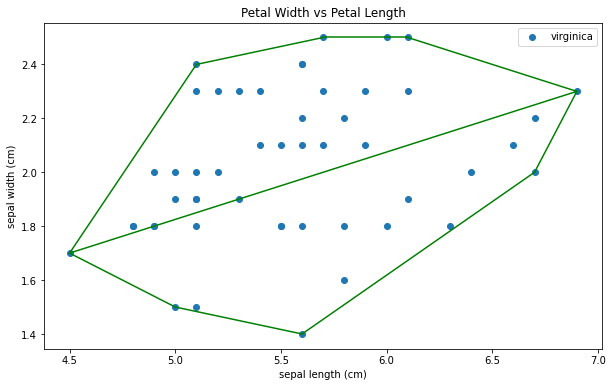

In [43]:
each = df[df['Target'] == 2]       
bucket = each.iloc[:,[2,3]].values
''' 1. Diurutkan berdasarkan nilai x dan y '''
quickSort(bucket,0,len(bucket)-1)

''' 2. Buat p1-pn sebagai line batas awal '''
line = [0,len(bucket)-1]
# a. Titik awal pada garis
p1   = bucket[line[0]]
# b. Titik akhir pada garis
p2   = bucket[line[1]]

''' 3. Bagi kumpulan titik yang lain menjadi 2 partisi
    Apabila berada pada garis p1-pn, maka abaikan '''
simplices = []
left  = []
right = []
''' 3.1. Check di garis atau tidak, di garis (det=0) '''
for i in range(1,len(bucket)-1):
    p3 = bucket[i]
    det = DetFrom3Point(p1,p2,p3)
    ''' 3.2 Jika tidak digaris, bagi menjadi bagian KIRI (det>0) dan KANAN (det<0) '''
    if   (det > 0):
        left  += [i]
    elif (det < 0):
        right += [i]
        
print("Kiri :", left)
print("kanan :", right)

lineL = [line[0],line[1]]
lineR = [line[1],line[0]]

# if left==[] and right==[]:
#     simplices += [line]

# elif left==[] and right!=[]:
#     simplices += [line]
#     simplices += NextSimplices(bucket,lineR,right)

# elif right==[] and left!=[]:
#     simplices += [line]
#     simplices += NextSimplices(bucket,lineL,left)

# else: # {left!=[] and right!=[]}
simplices += NextSimplices(bucket,lineL,left)
simplices += NextSimplices(bucket,lineR,right)
    
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[2])
for simplex in simplices:
    plt.plot(bucket[simplex, 0], bucket[simplex, 1], colors[2])
plt.plot(bucket[line, 0], bucket[line, 1], colors[2])
plt.legend()

In [44]:
bucket[9]

array([5.1, 1.5])